In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from tqdm import tqdm
import time
import os

In [2]:
path = "1d-simu"
if not os.path.exists(path):
    os.makedirs(path)

In [3]:
def get_distance(x):
    """
    returns the distance between two particles and for the outer two particles the distance to the boundary
    """
    d = np.zeros(N+1)
    d[0] = x[0] - sigma
    d[-1] = L - x[-1] - sigma
    for i in range(N-1):
        d[i+1] = x[i+1]-x[i] - 2*sigma
    
    return d

def update_distance(d,v):
    d_next = np.zeros_like(d)
    d_next[0] = d[0] + dt*v[0]
    d_next[-1] = d[-1] - dt*v[-1]

    for i in range(N-1):
        d_next[i+1] = d[i+1] + dt*(v[i+1]-v[i])
        
    return d_next

def total_energy(v):
    return 0.5*np.sum(v**2)

In [4]:
N = 10
L = 10
dt = 0.01
steps = 1000
sigma = 0.13
counter = 1
E = np.zeros(steps)

#initial configuration
x = np.linspace(1,L-1,N)
v  =  np.random.normal(0, 5, N)

for s in tqdm(range(steps)):
    
    d = get_distance(x)
    d_next = update_distance(d,v)
    R = np.zeros(N)
    
    if d_next[0] < 0:
        #particle 0 collids with boundary
        R[0] = -2*v[0]/dt
        
    if d_next[-1] < 0:
        #particle N collids with boundary
        R[-1] = -2*v[-1]/dt
        
    
    for i in range(N-1):
        if d_next[i+1] < 0:
            #particle i and i+1 collide
            v_free = v[i+1] - v[i]
            v_loc = -d[i+1]/dt
            R_loc = 0.5*(v_loc-v_free)/dt
            R[i] = - R_loc
            R[i+1] = R_loc
            
    v = v + dt*R
    x = x + dt*v
     
    E[s] = total_energy(v)
    
    
    #save the plot
    name = str(counter)+'.png'
    fig = plt.figure(figsize=(10, 2))
    plt.yticks([])
    plt.xticks([])
    plt.ylim([-0.1,0.1])
    plt.xlim([0,10])
    for p in range(N):
        plt.scatter(x[p],0,s=200)
    plt.savefig(os.path.join(path, name), dpi=300)
    plt.close(fig)
    
    counter += 1
    


100%|███████████████████████████████████████| 1000/1000 [01:17<00:00, 12.87it/s]


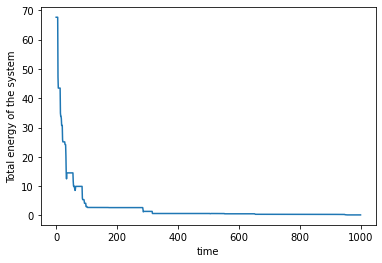

In [6]:
plt.figure()
plt.plot(E)
plt.xlabel("time")
plt.ylabel("Total energy of the system")
plt.savefig("energy_with_damping.svg", dpi = 300)
plt.show()